In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("gold_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
import pandas_profiling as pp

pp.ProfileReport(data)

C:\Users\ojasa\AppData\Local\Temp\ipykernel_24120\2371372215.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<AxesSubplot: title={'center': 'SPX'}>,
        <AxesSubplot: title={'center': 'GLD'}>],
       [<AxesSubplot: title={'center': 'USO'}>,
        <AxesSubplot: title={'center': 'SLV'}>],
       [<AxesSubplot: title={'center': 'EUR/USD'}>, <AxesSubplot: >]],
      dtype=object)

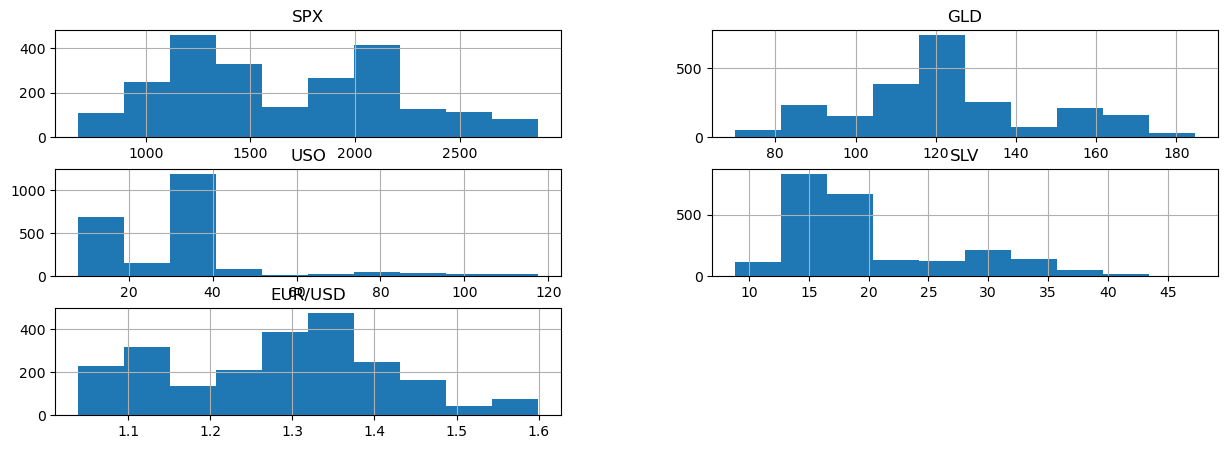

In [12]:
data.hist(figsize=(15, 5))

C:\Users\ojasa\AppData\Local\Temp\ipykernel_24120\804148467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

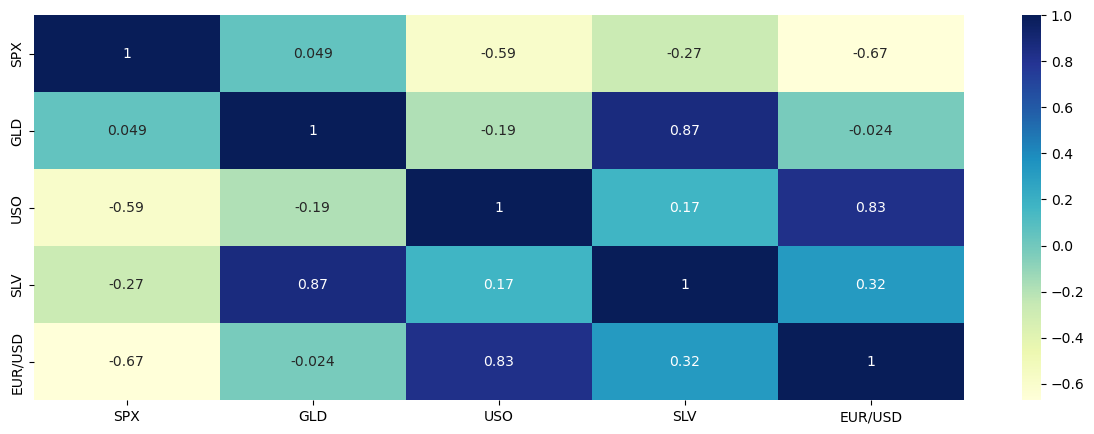

In [11]:
plt.figure(figsize=(15, 5))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [22]:
data["SPX"] = np.log(data['SPX']+1)
data["USO"] = np.log(data['USO']+1)
data["SLV"] = np.log(data['SLV']+1)

array([[<AxesSubplot: title={'center': 'SPX'}>,
        <AxesSubplot: title={'center': 'GLD'}>],
       [<AxesSubplot: title={'center': 'USO'}>,
        <AxesSubplot: title={'center': 'SLV'}>],
       [<AxesSubplot: title={'center': 'EUR/USD'}>, <AxesSubplot: >]],
      dtype=object)

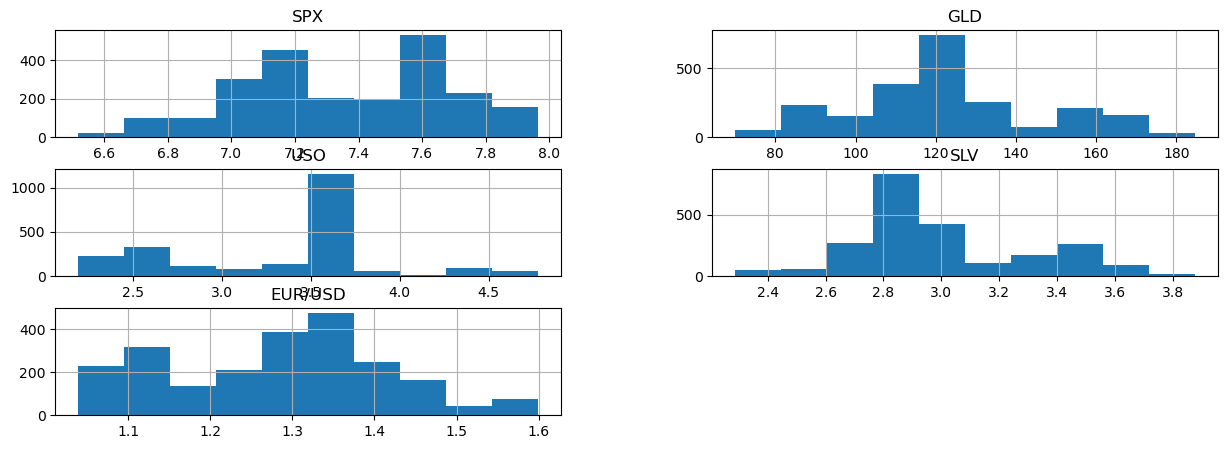

In [23]:
data.hist(figsize=(15, 5))

C:\Users\ojasa\AppData\Local\Temp\ipykernel_24120\1869963746.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

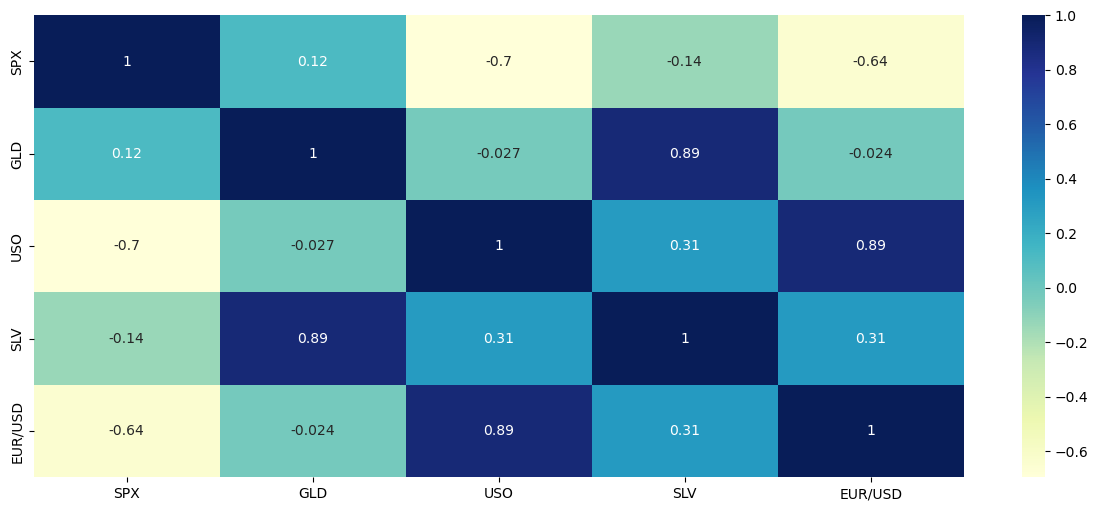

In [24]:
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# we determine that GLD might be redundant and can be dropped
# similary, date field can also be dropped

In [28]:
X = data.drop(['EUR/USD', 'Date'], axis=1)
y = data.loc[:, 'EUR/USD']
X.head()

,SPX,GLD,USO,SLV
0,7.278049,84.860001,4.375380,2.783776
1,7.278049,85.570000,4.374121,2.790244
2,7.253208,85.129997,4.360675,2.782972
3,7.256424,84.769997,4.337291,2.775896
4,7.237915,86.779999,4.344584,2.808800


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1946, 4)
(1946,)
(344, 4)
(344,)


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

LinearRegression()

In [34]:
print(linreg.score(X_train_sc, y_train))
linreg.score(X_test_sc, y_test)

0.8062855506276608


0.8053530108984925

In [46]:
from sklearn.linear_model import Ridge

rdg = Ridge()
rdg.fit(X_train_sc, y_train)

Ridge()

In [47]:
print(rdg.score(X_train_sc, y_train))
rdg.score(X_test_sc, y_test)

0.8062845810707735


0.8053512126385464

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

hgsr = GradientBoostingRegressor()
hgsr.fit(X_train_sc, y_train)

GradientBoostingRegressor()

In [56]:
print(hgsr.score(X_train_sc, y_train))
hgsr.score(X_test_sc, y_test)

0.9724151165158039


0.9626407810196437

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(X_train_sc, y_train)

RandomForestRegressor()

In [52]:
print(rfg.score(X_train_sc, y_train))
rfg.score(X_test_sc, y_test)

0.9974407967228571


0.9787437310033765

In [61]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [30, 50, 100, 200],
    "max_features" : [0, 2, 4],
    "min_samples_split" : [2, 4, 6],
    "max_depth" : [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid=param_grid,
                           cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_sc, y_train)

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [0, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [30, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
best_rfg = grid_search.best_estimator_
best_rfg

RandomForestRegressor(max_features=2, n_estimators=200)

In [64]:
print(best_rfg.score(X_train_sc, y_train))
best_rfg.score(X_test_sc, y_test)

0.997746379878514


0.9824169410720699

In [53]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_sc, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [54]:
print(xgb.score(X_train_sc, y_train))
xgb.score(X_test_sc, y_test)

0.9986511521616771


0.9795326507834369

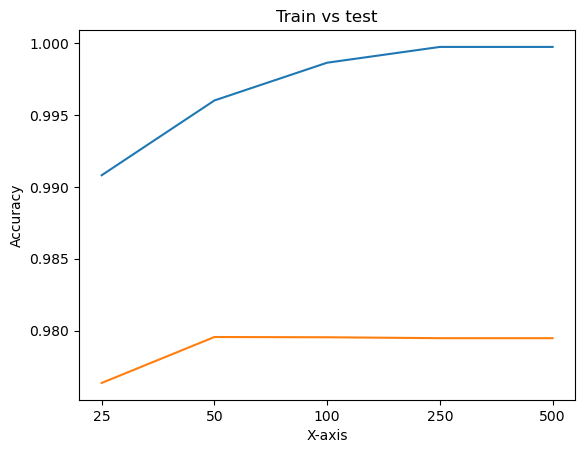

In [65]:
est = [25, 50, 100, 250, 500]

accuracy_list_train = []
accuracy_list_test = []

for i in est:
    model = XGBRegressor(n_estimators=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(est)), labels=est)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# 100 or 500 is the optimal value for n_estimators

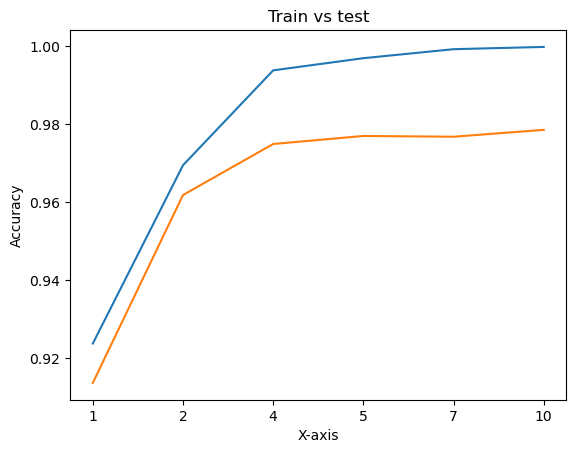

In [66]:
maxd = [1, 2, 4, 5, 7, 10]

accuracy_list_train = []
accuracy_list_test = []

for i in maxd:
    model = XGBRegressor(max_depth = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(maxd)), labels=maxd)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# 4 is the optimal value for max depth

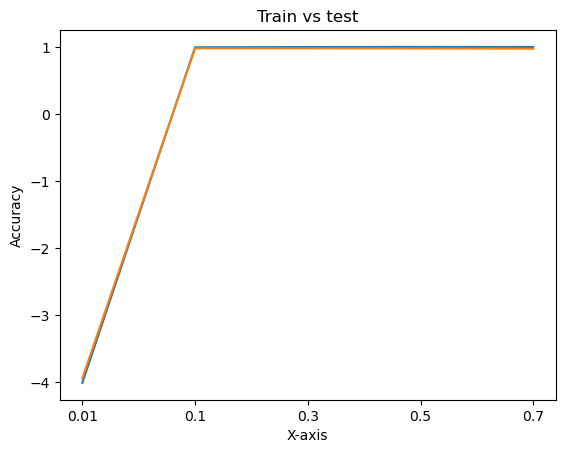

In [67]:
lr = [0.01, 0.1, 0.3, 0.5, 0.7]

accuracy_list_train = []
accuracy_list_test = []

for i in lr:
    model = XGBRegressor(eta = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(lr)), labels=lr)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# 0.1 can be  taken as the optimal value for eta

[14:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.

[14:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.

[14:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.

[14:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.



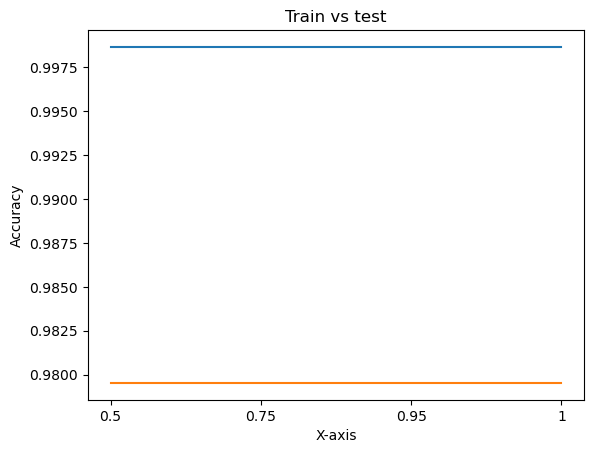

In [68]:
cols = [0.5, 0.75, 0.95, 1]

accuracy_list_train = []
accuracy_list_test = []

for i in cols:
    model = XGBRegressor(colsample_bytrees = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(cols)), labels=cols)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# model is not affected by colsample_bytrees

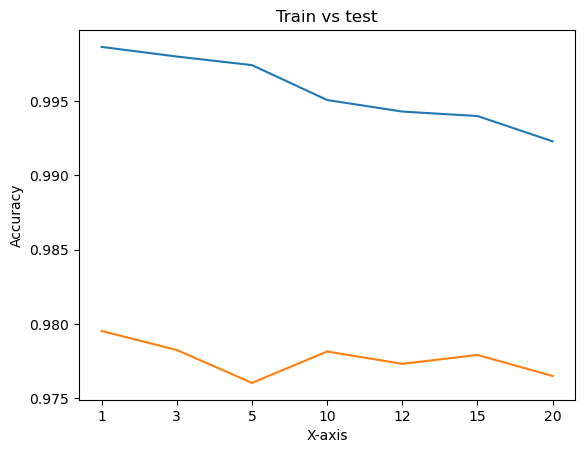

In [69]:
minc = [1, 3, 5, 10, 12, 15, 20]

accuracy_list_train = []
accuracy_list_test = []

for i in minc:
    model = XGBRegressor(min_child_weight = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(minc)), labels=minc)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [ ]:
# 1 or 10 can be the optimal values for min_child_weight

In [102]:
final_model = XGBRegressor(n_estimators = 500, max_depth = 8, eta = 0.1, columns_bytrees= 1, min_child_weight=1)
final_model.fit(X_train_sc, y_train)

[14:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "columns_bytrees" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, columns_bytrees=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, final_model.predict(X_test_sc))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, final_model.predict(X_test_sc))

In [97]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
Mean Absolute Error (MAE): 0.02


In [104]:
print("Final Accuracies using XGBoost Model: \n")
print(final_model.score(X_train_sc, y_train))
final_model.score(X_test_sc, y_test)

Final Accuracies using XGBoost Model: 

0.9997237842673115


0.9821503972745667

In [105]:
print("Final Accuracies using Random Forest Model: \n")
print(best_rfg.score(X_train_sc, y_train))
best_rfg.score(X_test_sc, y_test)

Final Accuracies using Random Forest Model: 

0.997746379878514


0.9824169410720699